# HW1) Apply Clustering to UCI Flags dataset
# Make the column "religion" to be the target variable.
# Keep/drop columns and make reasonable assumptions.

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Flags  
import pandas as pd



In [44]:
df = pd.read_csv('flag.data', header=None)

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [46]:
# added headers
headers = ['name','landmass','zone','area', 'population','language','religion','bars','stripes',
          'colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

In [47]:
df.columns = headers

In [48]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [39]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [50]:
# we need to drop off columns without values
# drop names, top left and botright
df = df.drop(['name','topleft','botright','mainhue'],axis=1)

In [51]:
df.columns

Index(['landmass', 'zone', 'area', 'population', 'language', 'religion',
       'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white',
       'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters',
       'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text'],
      dtype='object')

In [52]:
# move religion column to the end
df = df[['landmass', 'zone', 'area', 'population', 'language','bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white','black', 'orange', 'circles', 'crosses', 'saltires', 'quarters','sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'religion' ]]

In [53]:
df.columns

Index(['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes',
       'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',
       'triangle', 'icon', 'animate', 'text', 'religion'],
      dtype='object')

In [55]:
X = df[['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes',
       'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',
       'triangle', 'icon', 'animate', 'text']]
y = df[['religion']]

In [59]:
# normalize https://stackoverflow.com/questions/52007165/normalizing-rows-of-pandas-dataframe
from sklearn.preprocessing import Normalizer
X.iloc[:,:] = Normalizer(norm='l1').fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
X.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,0.007194,0.001439,0.932374,0.023022,0.014388,0.000000,0.004317,0.007194,0.001439,0.001439,...,0.0,0.0,0.0,0.0,0.001439,0.000000,0.000000,0.001439,0.000000,0.0
1,0.060000,0.020000,0.580000,0.060000,0.120000,0.000000,0.000000,0.060000,0.020000,0.000000,...,0.0,0.0,0.0,0.0,0.020000,0.000000,0.000000,0.000000,0.020000,0.0
2,0.001645,0.000411,0.982312,0.008227,0.003291,0.000823,0.000000,0.001234,0.000411,0.000411,...,0.0,0.0,0.0,0.0,0.000411,0.000411,0.000000,0.000000,0.000000,0.0
3,0.260870,0.130435,0.000000,0.000000,0.043478,0.000000,0.000000,0.217391,0.043478,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.043478,0.043478,0.043478,0.0
4,0.157895,0.052632,0.000000,0.000000,0.315789,0.157895,0.000000,0.157895,0.052632,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [61]:
df.corr() # there seems to be some corrolation between religion, language and landmass

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,religion
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,-0.139290,-0.063375,-0.062856,0.093400,0.026226,...,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743,0.325073
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,0.085446,0.002359,0.173567,-0.032269,0.069404,...,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602,-0.320537
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.001243,0.028454,-0.162227,-0.005470,-0.081328,...,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423,0.087941
population,0.105940,-0.124111,0.519030,1.000000,0.062804,-0.041392,0.030100,-0.115052,-0.024648,-0.047918,...,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194,0.172731
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,-0.049862,0.105409,-0.197883,-0.011048,0.006046,...,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977,0.422315
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,1.000000,-0.273371,-0.064574,-0.017093,0.116905,...,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709,-0.060000
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,-0.273371,1.000000,0.038278,0.014210,-0.085367,...,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564,0.103222
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.064574,0.038278,1.000000,0.311759,0.428388,...,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483,-0.017720
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,-0.017093,0.014210,0.311759,1.000000,0.031169,...,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507,0.121721
green,0.026226,0.069404,-0.081328,-0.047918,0.006046,0.116905,-0.085367,0.428388,0.031169,1.000000,...,-0.043077,0.126624,-0.085607,-0.068738,-0.007137,0.039840,0.190550,0.250157,0.243872,0.128843


In [62]:
# build a model
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Finding the optimum number of clusters for k-means classification
# n_clusters = Number of centroids to generate
# init = k-means++ = select convergence method
# max_iter = Maximum number of iterations of the k-means algorithm for a single run.
# n_init = 10 = Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state = 0 = random number generator is the RandomState instance used by np.random
# inertia = Sum of squared distances of samples to their closest cluster center
# WCSS = Witchin cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 33.58207788713206
2 8.032522305503674
3 5.1309354968198395
4 4.13300570268834
5 3.34175959765282
6 2.870519984709479
7 2.5006365621540594
8 2.2896553089564704
9 2.1297248987203585
10 1.974228549336495


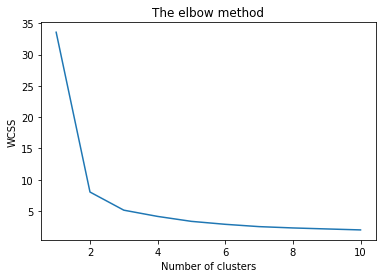

In [63]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [64]:
# best_n_clusters = 3
# but we've got 7 seperate religions. we'll use 7
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [65]:
print(kmeans.cluster_centers_) # Centroid ccordinates

[[ 9.57137576e-02  7.75384424e-02  3.45174360e-01  3.44136710e-02
   1.13067055e-01  0.00000000e+00  4.31848477e-02  1.19736620e-01
   2.10503358e-02  1.89452126e-02  1.14981022e-02  1.43318959e-02
   2.44777219e-02  1.33667853e-02  9.30331295e-03  3.67521368e-03
   5.41007456e-03  6.62241620e-03  3.77341335e-03  2.40384615e-03
  -1.08420217e-19  1.10713894e-02  9.51050644e-03  1.20558057e-02
   3.67521368e-03]
 [ 6.98185728e-03  4.06611486e-03  9.36863664e-01  2.22542066e-02
   1.06314640e-02  8.83541797e-04  3.59603641e-03  5.73460952e-03
   1.46280976e-03  9.72149230e-04  7.74981323e-04  9.17361609e-04
   1.12138915e-03  4.13991753e-04  7.19266914e-05  2.20319357e-04
   1.61701589e-04  5.78283431e-05  1.82975382e-04  1.65147603e-03
   1.61164884e-04  1.99977134e-04  3.53010714e-04  2.07063063e-04
   5.83791562e-05]
 [ 1.22688841e-01  1.67183373e-01  1.07954545e-02  2.27272727e-03
   5.29505712e-02  2.07386364e-02  2.31064166e-02  2.34013708e-01
   3.75230820e-02  2.76712383e-02  4.0

In [66]:
print(kmeans.labels_) # labels signifying similarity only

[1 4 1 2 5 1 2 2 1 1 1 6 4 5 4 2 4 0 1 2 4 1 1 1 2 5 6 1 1 4 1 1 5 2 1 1 1
 1 1 3 1 3 6 6 0 6 6 4 3 6 1 1 4 4 1 5 0 0 1 1 6 2 1 0 6 6 1 2 6 1 3 2 6 1
 4 1 4 6 5 6 6 6 1 1 1 6 4 6 1 0 6 6 1 1 2 0 1 0 4 6 1 5 5 1 6 1 5 1 5 5 1
 2 1 5 5 1 2 1 1 5 6 4 3 1 1 1 1 3 6 6 1 1 1 6 1 1 1 6 6 6 0 0 6 4 5 5 1 1
 2 6 5 4 1 1 4 1 1 4 2 2 2 2 1 6 0 1 6 6 4 1 1 6 5 0 1 1 2 3 6 6 6 1 2 1 1
 0 5 1 6 3 6 1 1 1]


In [67]:
from sklearn import metrics
print(metrics.classification_report(y, kmeans.labels_))
'''religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
'''

              precision    recall  f1-score   support

           0       0.08      0.03      0.04        40
           1       0.16      0.20      0.18        60
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        27
           6       0.25      0.67      0.36        15
           7       0.00      0.00      0.00         4

   micro avg       0.12      0.12      0.12       194
   macro avg       0.06      0.11      0.07       194
weighted avg       0.08      0.12      0.09       194



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,\n               5=Ethnic, 6=Marxist, 7=Others\n'

In [68]:
# first pass was a miserable .08% accuracy

In [16]:
# Your code here ...

# HW2) Apply PCA to MNIST dataset
# PCA reduces number of columns in the data.
# Apply PCA to go from 784 to xx columns while retaining data variance.
# Like in Iris example, rebuild the classifier with PC's.
# Make reasonable assumptions in your analysis.

In [70]:
# Your code here ...
# use last week's assignment to import data

In [71]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

In [72]:
# Function to read csv file
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line_split=line1.split(",")
        data_array.append(line_split)
    return data_array

In [74]:
mnist_train = read_file("mnist_train.csv")
dataset = np.array(mnist_train)
X2 = dataset[:,1:785]
y2 = dataset[:,0]

In [75]:
X = X2.astype(np.int)
y = y2.astype(np.int)

In [76]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [77]:
# grab pca stuff
import numpy as np
covariant_matrix = np.cov(X.T)
print(covariant_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [80]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [81]:
print(eigen_values)

[ 3.32724667e+05+0.00000000e+00j  2.43283939e+05+0.00000000e+00j
  2.11507367e+05+0.00000000e+00j  1.84776386e+05+0.00000000e+00j
  1.66926831e+05+0.00000000e+00j  1.47844962e+05+0.00000000e+00j
  1.12178203e+05+0.00000000e+00j  9.88744296e+04+0.00000000e+00j
  9.46962491e+04+0.00000000e+00j  8.08098245e+04+0.00000000e+00j
  7.23136203e+04+0.00000000e+00j  6.93583013e+04+0.00000000e+00j
  5.88268711e+04+0.00000000e+00j  5.80140840e+04+0.00000000e+00j
  5.41237569e+04+0.00000000e+00j  5.08430685e+04+0.00000000e+00j
  4.54126063e+04+0.00000000e+00j  4.37784591e+04+0.00000000e+00j
  4.07053405e+04+0.00000000e+00j  3.95197904e+04+0.00000000e+00j
  3.65535359e+04+0.00000000e+00j  3.45151939e+04+0.00000000e+00j
  3.26932861e+04+0.00000000e+00j  3.12865858e+04+0.00000000e+00j
  3.02875526e+04+0.00000000e+00j  2.87760784e+04+0.00000000e+00j
  2.78592854e+04+0.00000000e+00j  2.69605814e+04+0.00000000e+00j
  2.55331936e+04+0.00000000e+00j  2.36861230e+04+0.00000000e+00j
  2.25627619e+04+0.000000

784
[(0.09704664359713912+0j), (0.07095924059094508+0j), (0.06169088762368147+0j), (0.053894194865533936+0j), (0.04868797023474802+0j), (0.0431223131529377+0j), (0.03271929953821739+0j), (0.028838954462044163+0j), (0.02762029398770699+0j), (0.02357000549638673+0j), (0.021091896150670007+0j), (0.020229910817873363+0j), (0.017158181995308292+0j), (0.016921114320712638+0j), (0.01578641280508743+0j), (0.014829526132212592+0j), (0.013245609509041616+0j), (0.012768973677779787+0j), (0.011872629395942696+0j), (0.011526837013508479+0j), (0.010661662070853858+0j), (0.01006713371974417+0j), (0.009535733268460527+0j), (0.009125437456775565+0j), (0.008834046916650216+0j), (0.008393191407241119+0j), (0.008125788094691217+0j), (0.007863660841332555+0j), (0.007447331023113497+0j), (0.006908591276577821+0j), (0.006580937726120325+0j), (0.006481478699519117+0j), (0.00602615030154392+0j), (0.005865821878582325+0j), (0.005700214743363555+0j), (0.005436277707700888+0j), (0.005057864163712728+0j), (0.00487

ValueError: shape mismatch: objects cannot be broadcast to a single shape

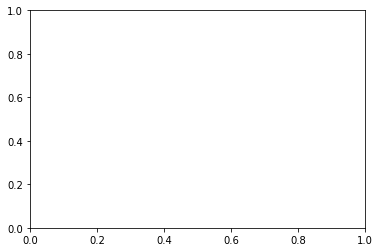

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
print(len(var_exp))
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,5),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,5),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # what happens if we keep this to only 2?
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2'])

In [84]:
print(pca.explained_variance_ratio_)

[0.09704664 0.07095924]


In [85]:
print(pca.components_)

[[-2.89500296e-18  9.89582253e-19 -9.27086793e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.49320011e-16 -1.11931025e-17  4.86218033e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [86]:
# PC1 = (0.36*SL)-(0.08*SW)+(0.85*PL)+(0.35*PW)
# PC2 = (0.65*SL)+(0.72*SW)-(0.17*PL)-(0.07*PW)
print(principalDf.head())
print(principalDf.tail())

   principal component 1  principal component 2
0             123.933802            -312.686625
1            1011.719035            -294.833043
2             -51.849149             392.154697
3            -799.123497            -607.191860
4            -382.758247             730.555940
       principal component 1  principal component 2
59995             -99.621301            -293.500259
59996             152.756734            -687.908132
59997            -178.051713             160.054411
59998             130.603814              -5.586784
59999            -173.434190             -24.736114


In [88]:
dfy = pd.DataFrame(y) # changing numpy array to pandas dataframe

In [89]:
finalDf = pd.concat([principalDf, dfy], axis = 1)

In [103]:
print(finalDf.head())
print(finalDf.tail())

   principal component 1  principal component 2  digit
0             123.933802            -312.686625      5
1            1011.719035            -294.833043      0
2             -51.849149             392.154697      4
3            -799.123497            -607.191860      1
4            -382.758247             730.555940      9
       principal component 1  principal component 2  digit
59995             -99.621301            -293.500259      8
59996             152.756734            -687.908132      3
59997            -178.051713             160.054411      5
59998             130.603814              -5.586784      6
59999            -173.434190             -24.736114      8


In [101]:
finalDf = finalDf.rename(index=str, columns={0:'digit'}) # need to throw a column name

In [102]:
finalDf.columns

Index(['principal component 1', 'principal component 2', 'digit'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

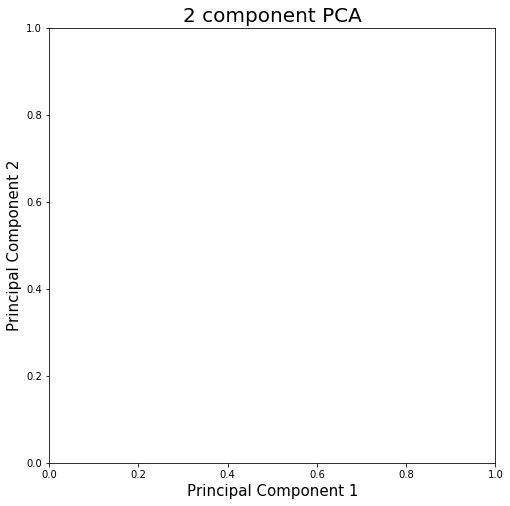

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1', '2']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['digit'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [105]:
X_pca2 = finalDf.loc[:,'principal component 1':'principal component 2']
y_pca2 = finalDf['digit']

In [106]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_pca2,y_pca2)
print(model)
# make predictions
expected = y_pca2
predicted = model.predict(X_pca2)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

   micro avg       1.00      1.00      1.00     60000


In [ ]:
# 100% seems too good